In [1]:
import pandas as pd ## Preparador de datos
import matplotlib.pyplot as plt ### Visualizador
import missingno as msno ### Para ver valores faltantes
import numpy as np ## Calculos matriciales
import seaborn as sns ### Estilizador y formateador de imagenes
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder


In [2]:
shapefile_path = 'C:\\Users\\JohanStivenPaezBermu\\OneDrive - Asulado\\Python\\Python_MSc\\Tesis\\ESE_Capacidad_Instalada\\ESE_Capacidad_Instalada.shp'
# Carga el Shapefile
Mapa_Antioquia = gpd.read_file(shapefile_path)
Mapa_Antioquia.head(1)

,OBJECTID,COD_MPIO,MPIO_NOMBR,COD_ZONA,COD_SUBREG,REGION,SUBREGION,ZONA,TERRIT_CAR,Shape__Are,Shape__Len,geometry
0,1,05761,SOPETRÁN,Z14,SR06,CORANTIOQUIA,OCCIDENTE,Cauca Medio,Hevexicos,2.190716e+08,93728.01466,"POLYGON ((826004.851 1211021.823, 825864.916 1..."


# CARGA DATOS DE SENSORES Y DATOS PRECIPITACION

In [3]:
df_Sensores = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\Precipitacion_2011_2023_ANT\\Consolidado_Precipitacion_Antioquia.csv")
#df_Sensores.shape ## (67172, 21)
df_Sensores['Fecha'] = pd.to_datetime(df_Sensores['Fecha'])

año_busqueda = 2017
df_Sensores = df_Sensores[df_Sensores['Fecha'].dt.year == año_busqueda]
df_Sensores.head(1).T

,932
CodigoEstacion,23085270
NombreEstacion,AEROPUERTO J.M. CORDOVA - AUT [23085270]
Latitud,6.168611
Longitud,-75.426111
Altitud,2131
Categoria,Sinóptica Principal
Entidad,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
AreaOperativa,Area Operativa 01 - Antioquia-Chocó
Departamento,Antioquia
Municipio,Rionegro


In [4]:
# COLOCO EL MUNICIPIO Y DEPARTAMENTO EN MAYUSCULA
df_Sensores['Municipio'] = df_Sensores['Municipio'].str.upper()
df_Sensores['Departamento'] = df_Sensores['Departamento'].str.upper()
df_Sensores.head(1).T

,932
CodigoEstacion,23085270
NombreEstacion,AEROPUERTO J.M. CORDOVA - AUT [23085270]
Latitud,6.168611
Longitud,-75.426111
Altitud,2131
Categoria,Sinóptica Principal
Entidad,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
AreaOperativa,Area Operativa 01 - Antioquia-Chocó
Departamento,ANTIOQUIA
Municipio,RIONEGRO


In [5]:
df_Cod_DANE = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\COD_MUNICIPIOS.csv",encoding='latin1')
#df_Cod_DANE.shape # (1103, 5)
df_Cod_DANE['Municipio'] = df_Cod_DANE['Municipio'].str.upper()
df_Cod_DANE['Departamento'] = df_Cod_DANE['Departamento'].str.upper()
df_Cod_DANE.head(1)

,cod_depto,cod_muni,Departamento,Municipio,cobertura
0,5,1,ANTIOQUIA,MEDELLÍN,77


In [6]:
#df_Cod_DANE['codigo_DANE'] = df_Cod_DANE.apply(lambda row: ''.join(row[['cod_depto', 'cod_muni']]), axis=1)
longitud_municipio = 3
longitud_departamento = 2
df_Cod_DANE['cod_muni'] = df_Cod_DANE['cod_muni'].astype(str)
df_Cod_DANE['cod_muni'] = df_Cod_DANE['cod_muni'].apply(lambda x: x.zfill(longitud_municipio) if len(x) < longitud_municipio else x)

df_Cod_DANE['cod_depto'] = df_Cod_DANE['cod_depto'].astype(str)
df_Cod_DANE['cod_depto'] = df_Cod_DANE['cod_depto'].apply(lambda x: x.zfill(longitud_departamento) if len(x) < longitud_departamento else x)

df_Cod_DANE['codigo_DANE'] = df_Cod_DANE.apply(lambda row: ''.join([str(row['cod_depto']), str(row['cod_muni'])]), axis=1)
df_Cod_DANE.head(1)


,cod_depto,cod_muni,Departamento,Municipio,cobertura,codigo_DANE
0,05,001,ANTIOQUIA,MEDELLÍN,77,05001


In [7]:
df_merge_DANE_SENSOR = pd.merge(df_Cod_DANE, df_Sensores, on='Municipio', how='left')
df_merge_DANE_SENSOR.head(1).T

,0
cod_depto,05
cod_muni,001
Departamento_x,ANTIOQUIA
Municipio,MEDELLÍN
cobertura,77
codigo_DANE,05001
CodigoEstacion,27015330.0
NombreEstacion,OLAYA HERRERA - AUT [27015330]
Latitud,6.224679
Longitud,-75.588225


In [8]:
Sensores_Unicos = df_merge_DANE_SENSOR.drop_duplicates(subset=['codigo_DANE'])##NombreEstacion
Sensores_Unicos.head(1).T

,0
cod_depto,05
cod_muni,001
Departamento_x,ANTIOQUIA
Municipio,MEDELLÍN
cobertura,77
codigo_DANE,05001
CodigoEstacion,27015330.0
NombreEstacion,OLAYA HERRERA - AUT [27015330]
Latitud,6.224679
Longitud,-75.588225


In [9]:
conteo_registros_por_ciudad = Sensores_Unicos['Municipio'].value_counts()
conteo_registros_por_ciudad.head(1).T

LA UNIÓN    4
Name: Municipio, dtype: int64

In [10]:
Sensores_Unicos = Sensores_Unicos.rename(columns={'codigo_DANE': 'COD_MPIO'})
Sensores_Unicos.head(1).T
###########################################3
######################################3
df_Precipitaciones = Sensores_Unicos.copy()
df_Precipitaciones.shape
###########################################3

(1103, 26)

In [12]:
mapa_con_sensores = Mapa_Antioquia.merge(Sensores_Unicos, on='COD_MPIO', how='left')
#mapa_con_sensores.shape #(125, 37)

<Axes: >

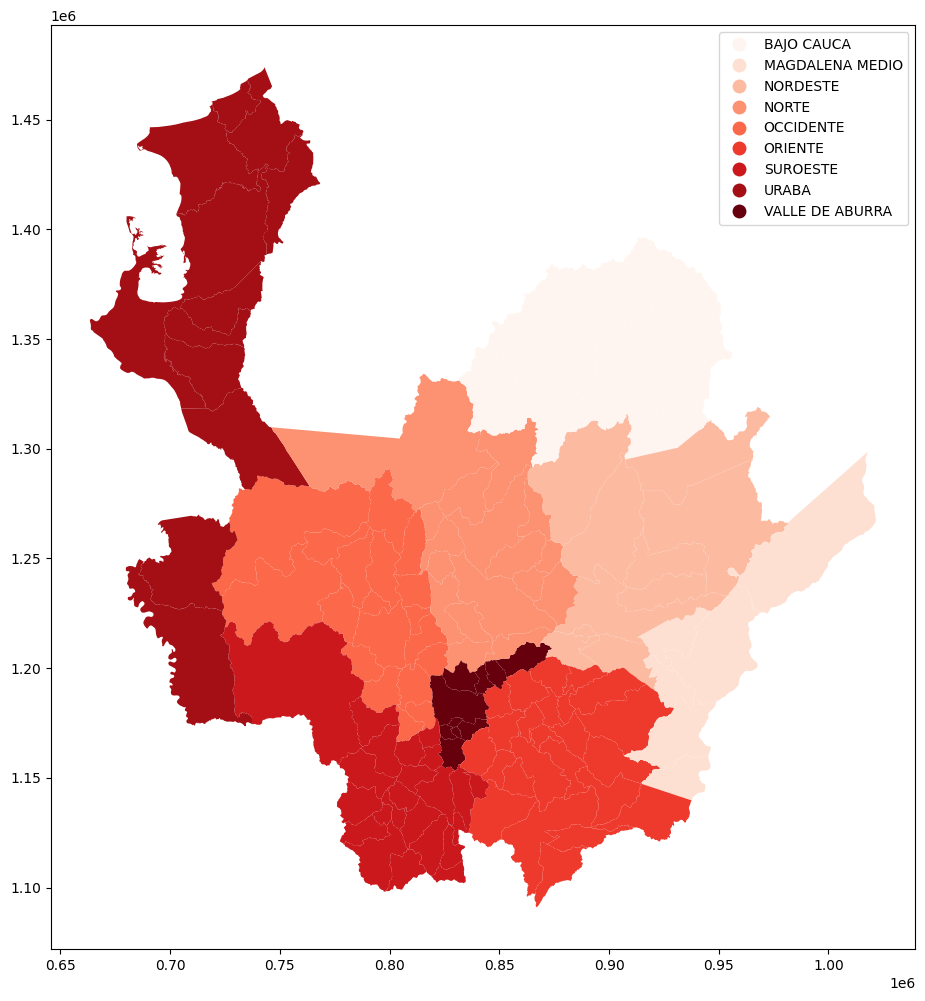

In [13]:
mapa_con_sensores.plot(column='SUBREGION', cmap='Reds', legend=True, figsize=(20, 12))

# MAPA DE PRECIPITACIONES VALORES

In [14]:
df_Precipitaciones.head(1).T

,0
cod_depto,05
cod_muni,001
Departamento_x,ANTIOQUIA
Municipio,MEDELLÍN
cobertura,77
COD_MPIO,05001
CodigoEstacion,27015330.0
NombreEstacion,OLAYA HERRERA - AUT [27015330]
Latitud,6.224679
Longitud,-75.588225


In [15]:
# Filtrar los datos por año deseado
## año_deseado = 2018  # Año que deseas filtrar
#df_año_deseado = df_YYYY[df_YYYY['Fecha'] == año_deseado]
##df_agrupado = df_Precipitaciones.groupby('Fecha')['Valor'].sum().reset_index()

df_Precipitaciones['Fecha'] = pd.to_datetime(df_Precipitaciones['Fecha'])
df_Precipitaciones['Fecha'] = df_Precipitaciones['Fecha'].dt.year
df_agrupado = df_Precipitaciones.groupby('Fecha')['Valor'].sum().reset_index()
# Mostrar los datos filtrados
print(df_agrupado)


    Fecha  Valor
0  2017.0    1.8


In [43]:

# # # # Convertir la columna 'fecha' a datetime
# # # df_Sensores['Fecha'] = pd.to_datetime(df_Sensores['Fecha'])

# # # # Ahora puedes acceder al atributo .dt
# # # fechas_unicas = df_Sensores['Fecha'].dt.year.unique()
# # # año_busqueda = 2023
# # # df_Sensores = df_Sensores[df_Sensores['Fecha'].dt.year == año_busqueda]
#print (df_Precipitaciones.head(1).T)

In [16]:
df_Precipitaciones.head(1)

,cod_depto,cod_muni,Departamento_x,Municipio,cobertura,COD_MPIO,CodigoEstacion,NombreEstacion,Latitud,Longitud,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,05,001,ANTIOQUIA,MEDELLÍN,77,05001,27015330.0,OLAYA HERRERA - AUT [27015330],6.224679,-75.588225,...,NaN,PRECIPITACION,PT_10_TT_D,Precipitación total diaria (automática),Diaria,2017.0,0.0,50.0,NaN,900.0


In [62]:
# # Convertir la columna 'fecha' a tipo datetime si aún no lo está
# año_busqueda = 2013
# #df_Sensores = df_Sensores[df_Sensores['Fecha'].dt.year == año_busqueda]

# # Filtrar los valores mayores que 0 en la columna 'columna' y la fecha específica en la columna 'fecha'
# valores_filtrados = df_Precipitaciones[(df_Precipitaciones['Valor'] > 0) & (df_Precipitaciones['Fecha'].dt.year == año_busqueda)]
# print (valores_filtrados)



In [17]:
fechas_unicas = df_Precipitaciones['Fecha'].dt.year.unique()
fechas_unicas

AttributeError: Can only use .dt accessor with datetimelike values

In [73]:
df_Precipitaciones['Fecha'] = pd.to_datetime(df_Precipitaciones['Fecha'])
df_Precipitaciones['Fecha'] = df_Precipitaciones['Fecha'].dt.year
df_agrupado = df_Precipitaciones.groupby('Fecha')['Valor'].sum().reset_index()
#valores_unicos = df_Precipitaciones['Fecha'].unique()
#valores_unicos
#df_YYYY
df_agrupado.head(10)

,Fecha,Valor
0,1970.0,33180.29


In [11]:
df_agrupado.head(16)

,Fecha,Valor
0,2011,14214.500
1,2012,10805.000
2,2013,14189.000
3,2014,7387.700
4,2015,8144.640
5,2016,9645.920
6,2017,27096.582
7,2018,65728.746
8,2019,29597.216
9,2020,15928.606


# 3 Analisis de Areas Cultivadas en Antioquia

In [18]:
df_Areas_Cult_ANT = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\Agricultura_Antiquia_1990_2024\\Areas_cultivadas_y_produccion_agr_cola_en_Antioquia_desde_1990_20240310.csv")

In [19]:
valores_unicos = df_Areas_Cult_ANT['Año'].unique()
print(valores_unicos)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021]


In [20]:
Year_Filtro = 2017

In [21]:
df_Areas_Cult_ANT = df_Areas_Cult_ANT[df_Areas_Cult_ANT['Año'] == Year_Filtro]
#df_Areas_Cult_ANT.head(1)

In [22]:
df_Areas_Cult_ANT['Municipio'] = df_Areas_Cult_ANT['Municipio'].str.upper()
df_Areas_Cult_ANT['Subregion'] = df_Areas_Cult_ANT['Subregion'].str.upper()
#df_Areas_Cult_ANT.head(1)

In [23]:
df_Agrupado_Prod = df_Areas_Cult_ANT.groupby(['Municipio','Rubro'])['Área Producción'].sum().reset_index()
df_Agrupado_Prod.head(10)

,Municipio,Rubro,Área Producción
0,ABEJORRAL,Aguacate Hass,446.0
1,ABEJORRAL,Cacao,5.0
2,ABEJORRAL,Café,3105.2
3,ABEJORRAL,Caña,210.0
4,ABEJORRAL,Flores (Hortensias),120.0
5,ABEJORRAL,Fríjol Voluble,250.0
6,ABEJORRAL,Lulo,25.0
7,ABEJORRAL,Maíz Tradicional,200.0
8,ABEJORRAL,Mora,6.0
9,ABEJORRAL,Papa,156.0


In [24]:
df_Agrupado_Prod = df_Areas_Cult_ANT.groupby(['Rubro'])['Área Producción'].sum().reset_index()
#grupo_ordenado = df_Agrupado_Prod.sum(axis=1).sort_values(ascending=False)
df_ordenado = df_Agrupado_Prod.sort_values(by='Área Producción', ascending=False)
df_ordenado.head(10)

,Rubro,Área Producción
23,Café,114448.3
27,Caña,36585.2
15,Banano Exportación,34789.0
95,Plátano En Asocio,21197.7
96,Plátano Monocultivo,21051.0
74,Maíz Tradicional,20913.8
12,Arroz Tradicional,17564.0
22,Cacao,16201.3
106,Yuca,8704.2
52,Fríjol Voluble,7603.8


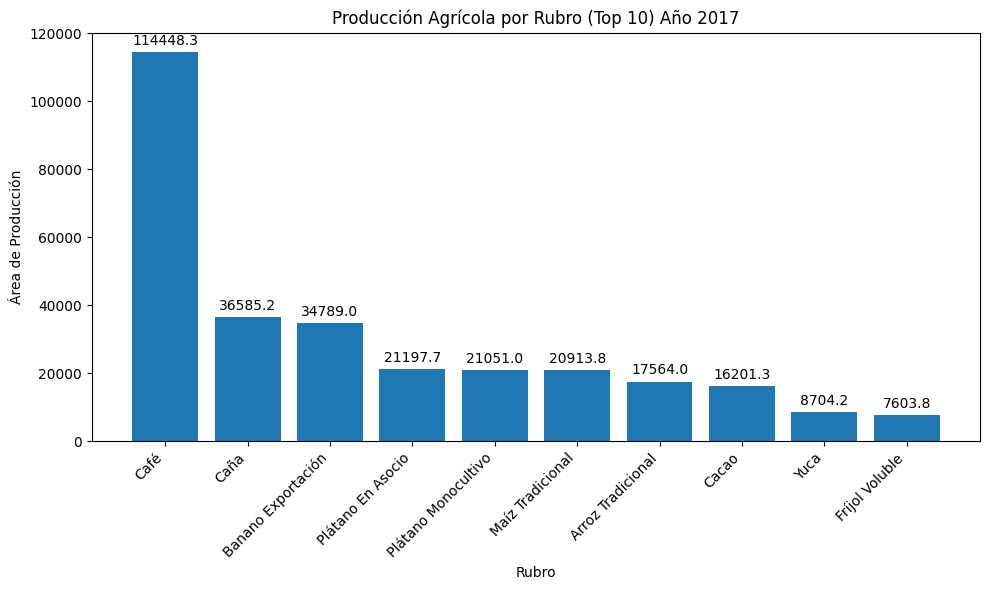

In [25]:
# Crear la figura y los ejes
# Seleccionar las 10 primeras filas del DataFrame
df_10_primeros = df_ordenado.head(10)
fig, ax = plt.subplots(figsize=(10, 6))
# Crear el gráfico de barras verticales
bars = ax.bar(df_10_primeros['Rubro'], df_10_primeros['Área Producción'])

# Agregar etiquetas en las barras con los valores superiores
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas y título
ax.set_xlabel('Rubro')
ax.set_ylabel('Área de Producción')
ax.set_title('Producción Agrícola por Rubro (Top 10) Año 2017')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# POR REGION

In [26]:
df_Agrupado_Prod_Reg = df_Areas_Cult_ANT.groupby(['Subregion','Rubro'])['Área Producción'].sum().reset_index()
#df_Agrupado_Prod_Reg.head(10)

In [122]:
df_Agrupado_Prod_Reg = df_Areas_Cult_ANT.groupby(['Subregion','Rubro'])['Área Producción'].sum().reset_index()
#grupo_ordenado = df_Agrupado_Prod.sum(axis=1).sort_values(ascending=False)
df_ordenado_REG = df_Agrupado_Prod_Reg.sort_values(by='Área Producción', ascending=False)
df_ordenado_REG.head(10)

,Subregion,Rubro,Área Producción
224,SUROESTE,Café,57944.4
278,URABÁ,Banano Exportación,34789.0
118,OCCIDENTE,Café,22598.4
302,URABÁ,Plátano Monocultivo,18270.0
41,NORDESTE,Caña,15006.5
167,ORIENTE,Café,13659.6
277,URABÁ,Arroz Tradicional,12305.0
295,URABÁ,Maíz Tradicional,10075.6
266,SUROESTE,Plátano En Asocio,9892.7
68,NORTE,Café,9285.1


In [27]:
# Seleccionar los 10 primeros registros ordenados
df_top10 = df_ordenado_REG.head(10)

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Inicializar la variable bottom
bottom = None

# Iterar sobre cada registro y graficar una barra apilada
for index, row in df_top10.iterrows():
    subregion = row['Subregion']
    rubro = row['Rubro']
    produccion = row['Área Producción']
    
    # Si es la primera barra, bottom es None (no hay barra debajo)
    if bottom is None:
        ax.bar(rubro, produccion, label=subregion)
        bottom = produccion
    else:
        ax.bar(rubro, produccion, bottom=bottom, label=subregion)
        bottom += produccion

# Configurar ejes y etiquetas
ax.set_ylabel('Producción')
ax.set_title('Producción por Subregión y Rubro (Top 10)')
ax.set_xticklabels(df_top10['Rubro'], rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
ax.legend(title='Subregión')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



NameError: name 'df_ordenado_REG' is not defined

## Archivo: Datos de calidad del aire en colombia 2011 al 2018


In [28]:
df_Calidad_Aire = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018_20240310.csv")
#df_Calidad_Aire.shape ##(2,975,613, 16)

C:\Users\JohanStivenPaezBermu\AppData\Local\Temp\ipykernel_3212\2911455793.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Calidad_Aire = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018_20240310.csv")


In [29]:
df_Calidad_Aire.head(1)

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
0,09/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,55.57,"(6.436, -75.333431)"


In [30]:
valores_unicos = df_Calidad_Aire['Variable'].unique()
print(valores_unicos)

['PM10' 'Dirección del Viento' 'O3' 'Humedad Relativa 10 m'
 'Humedad Relativa 2 m' 'Presión Atmosférica' 'Precipitación Líquida'
 'Radiación Solar Global' 'Temperatura a 10 m' 'Temperatura a 2 m'
 'Velocidad del Viento' 'PM2.5' 'NO' 'NO2' 'CO' 'PST' 'Temperatura' 'SO2'
 'Humedad Relativa']


In [31]:
df_Calidad_Aire['Fecha'] = pd.to_datetime(df_Calidad_Aire['Fecha'])
df_Calidad_Aire['Fecha'] = df_Calidad_Aire['Fecha'].dt.year
df_Calidad_Aire.head(1)
#df_agrupado = df_Calidad_Aire.groupby('Fecha')['Valor'].sum().reset_index()
# Mostrar los datos filtrados

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
0,2011,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,55.57,"(6.436, -75.333431)"


In [78]:
# # # # Convertir la columna 'fecha' a datetime
# # # df_Sensores['Fecha'] = pd.to_datetime(df_Sensores['Fecha'])

# # # # Ahora puedes acceder al atributo .dt
# # # fechas_unicas = df_Sensores['Fecha'].dt.year.unique()
año_busqueda = 2017
df_Calidad_Aire_2017 = df_Calidad_Aire[df_Calidad_Aire['Fecha'] == año_busqueda]
##df_Calidad_Aire_2017.shape ##(460238, 16)


In [79]:
Indicardor = 'Precipitación Líquida'
df_Calidad_Aire_indicador = df_Calidad_Aire_2017[df_Calidad_Aire_2017['Variable'] == Indicardor]
#df_Calidad_Aire_indicador.shape #(26896, 16)

In [80]:
df_Calidad_Aire_indicador = df_Calidad_Aire_indicador[df_Calidad_Aire_indicador['Concentración'] != 0]
#df_Calidad_Aire_indicador.shape ## (2692, 16)
df_Calidad_Aire_indicador.head(1)

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
535526,2017,AMVA,CEN-Tráfico Centro,Automática,6.252639,-75.569833,5,ANTIOQUIA,5001,MEDELLÍN,Fija,1,Precipitación Líquida,mm,0.1,"(6.252639, -75.569833)"


In [81]:
df_Calidad_Aire_indicador = df_Calidad_Aire_indicador.loc[(df_Calidad_Aire_indicador['Variable'] == Indicardor) & 
                     (df_Calidad_Aire_indicador['Concentración'] != 0)]

In [74]:
#df_filtrado.shape #(2692, 16)

In [83]:
df_Calidad_Aire_indicador.head(1)

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
535526,2017,AMVA,CEN-Tráfico Centro,Automática,6.252639,-75.569833,5,ANTIOQUIA,5001,MEDELLÍN,Fija,1,Precipitación Líquida,mm,0.1,"(6.252639, -75.569833)"


In [84]:
df_Agrupado_Indicador = df_Calidad_Aire_indicador.groupby(['Nombre del municipio','Departamento'])['Concentración'].sum().reset_index()
#grupo_ordenado = df_Agrupado_Prod.sum(axis=1).sort_values(ascending=False)
df_Agrupado_Indicador_Order = df_Agrupado_Indicador.sort_values(by='Concentración', ascending=False)
df_Agrupado_Indicador_Order.head(10)
## La variable CONCENTRACION me esta sumando 

df_Agrupado_Indicador_Order['Concentración'] = df_Agrupado_Indicador_Order['Concentración'].map('{:.2f}'.format)
df_Agrupado_Indicador_Order.head(10)

,Nombre del municipio,Departamento,Concentración
3,MEDELLÍN,ANTIOQUIA,2308.32
1,GIRARDOTA,ANTIOQUIA,1693.50
4,SABANETA,ANTIOQUIA,982.90
2,ITAGÜÍ,ANTIOQUIA,919.50
0,CAUCASIA,ANTIOQUIA,0.39


# PRUEBA..... tal vez borrar

In [169]:
df_Agrupado_Indicador = df_Calidad_Aire_indicador.groupby(['Nombre del municipio','Departamento'])
#grupo_ordenado = df_Agrupado_Prod.sum(axis=1).sort_values(ascending=False)
#df_Agrupado_Indicador_Order = df_Agrupado_Indicador.sort_values(by='Nombre del municipio', ascending=False)
df_Agrupado_Indicador.head(1)

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
535421,2017,AMVA,CEN-Tráfico Centro,Automática,6.252639,-75.569833,5,ANTIOQUIA,5001,MEDELLÍN,Fija,1,Precipitación Líquida,mm,0.0,"(6.252639, -75.569833)"
694053,2017,AMVA,GIR-I.E. Col. Colombia,Automática,6.378517,-75.443986,5,ANTIOQUIA,5308,GIRARDOTA,Fija,1,Precipitación Líquida,mm,0.0,"(6.378517, -75.443986)"
1168395,2017,AMVA,ITA-Col. Concejo,Automática,6.171250,-75.647694,5,ANTIOQUIA,5360,ITAGÜÍ,Fija,1,Precipitación Líquida,mm,0.0,"(6.17125, -75.647694)"
2179634,2017,AMVA,SUR-Tráfico Sur,Automática,6.152313,-75.627487,5,ANTIOQUIA,5631,SABANETA,Fija,1,Precipitación Líquida,mm,0.0,"(6.1523128, -75.6274872)"
2219406,2017,CORANTIOQUIA,Caucasia,Manual,7.992933,-75.198303,5,ANTIOQUIA,5154,CAUCASIA,Fija,24,Precipitación Líquida,mm,0.0,"(7.992933, -75.198303)"
